In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Task: Compare CountVectorizer vs TF-IDF for Spam Classification

Compare the performance of Multinomial Naive Bayes with two different feature extraction methods:
1. **CountVectorizer** with stop_words
2. **TF-IDF** with stop_words

# 1. Load Data

In [2]:
df = pd.read_csv('../../datasets/spam.csv', encoding='latin-1')

display(df.head(10))
print(f"\nDataset shape: {df.shape}")

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN



Dataset shape: (5572, 5)


# 2. Data Preprocessing

## 2.1 Drop Unnecessary Columns

In [3]:
df = df.drop(df.columns[2:], axis=1)
df = df.rename(columns={'v1': 'Labels', 'v2': 'SMS'})

display(df.head(10))

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


## 2.2 Data Inspection

In [4]:
print("=== Label Distribution ===")
display(df['Labels'].value_counts())
print(f"\nPercentage:")
display(df['Labels'].value_counts(normalize=True) * 100)

print("\n=== Dataset Info ===")
display(df.info())

print("\n=== Missing Values ===")
display(df.isnull().sum())

=== Label Distribution ===


Labels
ham     4825
spam     747
Name: count, dtype: int64


Percentage:


Labels
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


None


=== Missing Values ===


Labels    0
SMS       0
dtype: int64

## 2.3 Label Encoding

In [5]:
df['Labels'] = df['Labels'].map({'spam': 1, 'ham': 0})

display(df.head(15))
display(df['Labels'].value_counts())

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


Labels
0    4825
1     747
Name: count, dtype: int64

## 2.4 Split Features and Labels

In [6]:
X = df['SMS'].values
y = df['Labels'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=30, stratify=y
)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
print(f"\nTrain label distribution:")
print(pd.Series(y_train).value_counts())
print(f"\nTest label distribution:")
print(pd.Series(y_test).value_counts())

Training set size: 4457
Testing set size: 1115

Train label distribution:
0    3859
1     598
Name: count, dtype: int64

Test label distribution:
0    966
1    149
Name: count, dtype: int64


# 3. Scenario 1: CountVectorizer with Stop Words

## 3.1 Feature Extraction with CountVectorizer

In [7]:
print("=== CountVectorizer with Stop Words ===\n")

# Initialize CountVectorizer with stop_words
cv = CountVectorizer(stop_words='english')

# Fit and transform training data
X_train_cv = cv.fit_transform(X_train)

# Transform test data
X_test_cv = cv.transform(X_test)

print(f"Total unique words: {len(cv.get_feature_names_out())}")
print(f"Training data shape: {X_train_cv.shape}")
print(f"Testing data shape: {X_test_cv.shape}")

# Show sample of features
print(f"\nSample features: {cv.get_feature_names_out()[:20]}")

=== CountVectorizer with Stop Words ===

Total unique words: 7503
Training data shape: (4457, 7503)
Testing data shape: (1115, 7503)

Sample features: ['00' '000' '000pes' '008704050406' '0121' '01223585334' '0125698789' '02'
 '0207' '02072069400' '02073162414' '021' '03' '04' '0430' '05' '050703'
 '0578' '06' '07']


## 3.2 Model Training and Evaluation

In [8]:
# Train Multinomial Naive Bayes
mnb_cv = MultinomialNB()
mnb_cv.fit(X_train_cv, y_train)

# Predictions
y_train_pred_cv = mnb_cv.predict(X_train_cv)
y_test_pred_cv = mnb_cv.predict(X_test_cv)

# Calculate accuracies
train_acc_cv = accuracy_score(y_train, y_train_pred_cv)
test_acc_cv = accuracy_score(y_test, y_test_pred_cv)

print("=== CountVectorizer Results ===\n")
print(f"Training Accuracy: {train_acc_cv:.4f}")
print(f"Testing Accuracy: {test_acc_cv:.4f}")
print(f"\n{classification_report(y_test, y_test_pred_cv, target_names=['Ham', 'Spam'])}")

=== CountVectorizer Results ===

Training Accuracy: 0.9957
Testing Accuracy: 0.9812

              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       966
        Spam       0.93      0.93      0.93       149

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



## 3.3 Confusion Matrix

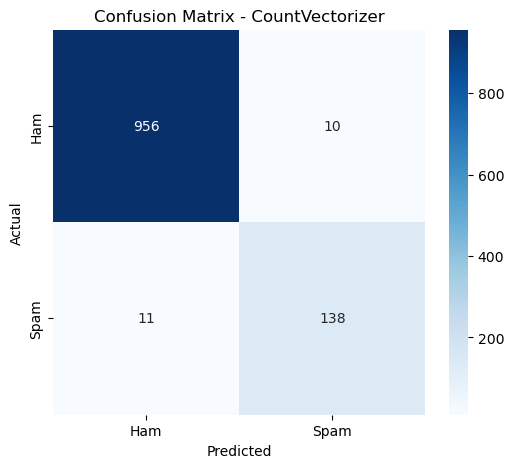

In [9]:
cm_cv = confusion_matrix(y_test, y_test_pred_cv)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_cv, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Ham', 'Spam'], 
            yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix - CountVectorizer')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 4. Scenario 2: TF-IDF with Stop Words

## 4.1 Feature Extraction with TF-IDF

In [10]:
print("=== TF-IDF Vectorizer with Stop Words ===\n")

# Initialize TfidfVectorizer with stop_words
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform test data
X_test_tfidf = tfidf.transform(X_test)

print(f"Total unique words: {len(tfidf.get_feature_names_out())}")
print(f"Training data shape: {X_train_tfidf.shape}")
print(f"Testing data shape: {X_test_tfidf.shape}")

# Show sample of features
print(f"\nSample features: {tfidf.get_feature_names_out()[:20]}")

=== TF-IDF Vectorizer with Stop Words ===

Total unique words: 7503
Training data shape: (4457, 7503)
Testing data shape: (1115, 7503)

Sample features: ['00' '000' '000pes' '008704050406' '0121' '01223585334' '0125698789' '02'
 '0207' '02072069400' '02073162414' '021' '03' '04' '0430' '05' '050703'
 '0578' '06' '07']


## 4.2 Model Training and Evaluation

In [11]:
# Train Multinomial Naive Bayes
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(X_train_tfidf, y_train)

# Predictions
y_train_pred_tfidf = mnb_tfidf.predict(X_train_tfidf)
y_test_pred_tfidf = mnb_tfidf.predict(X_test_tfidf)

# Calculate accuracies
train_acc_tfidf = accuracy_score(y_train, y_train_pred_tfidf)
test_acc_tfidf = accuracy_score(y_test, y_test_pred_tfidf)

print("=== TF-IDF Results ===\n")
print(f"Training Accuracy: {train_acc_tfidf:.4f}")
print(f"Testing Accuracy: {test_acc_tfidf:.4f}")
print(f"\n{classification_report(y_test, y_test_pred_tfidf, target_names=['Ham', 'Spam'])}")

=== TF-IDF Results ===

Training Accuracy: 0.9823
Testing Accuracy: 0.9713

              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       966
        Spam       1.00      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



## 4.3 Confusion Matrix

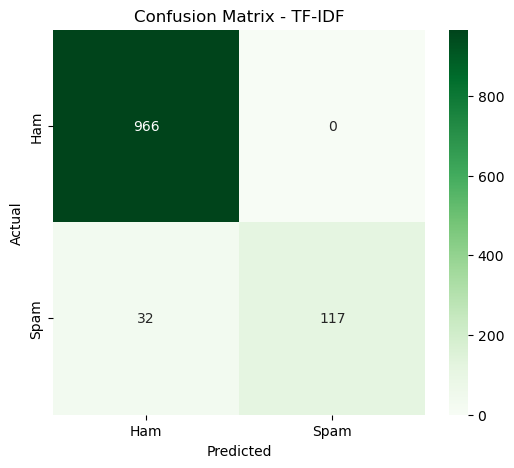

In [12]:
cm_tfidf = confusion_matrix(y_test, y_test_pred_tfidf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Ham', 'Spam'], 
            yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix - TF-IDF')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 5. Comparison and Analysis

## 5.1 Performance Comparison

In [13]:
# Create comparison dataframe
comparison = pd.DataFrame({
    'Feature Extraction': ['CountVectorizer', 'TF-IDF'],
    'Train Accuracy': [train_acc_cv, train_acc_tfidf],
    'Test Accuracy': [test_acc_cv, test_acc_tfidf],
    'Total Features': [X_train_cv.shape[1], X_train_tfidf.shape[1]]
})

display(comparison)

# Calculate difference
accuracy_diff = test_acc_tfidf - test_acc_cv
print(f"\nAccuracy Difference (TF-IDF - CountVectorizer): {accuracy_diff:.4f}")
print(f"Better Method: {'TF-IDF' if accuracy_diff > 0 else 'CountVectorizer' if accuracy_diff < 0 else 'Equal'}")

,Feature Extraction,Train Accuracy,Test Accuracy,Total Features
0,CountVectorizer,0.995737,0.981166,7503
1,TF-IDF,0.982275,0.971300,7503



Accuracy Difference (TF-IDF - CountVectorizer): -0.0099
Better Method: CountVectorizer


## 5.2 Visualization

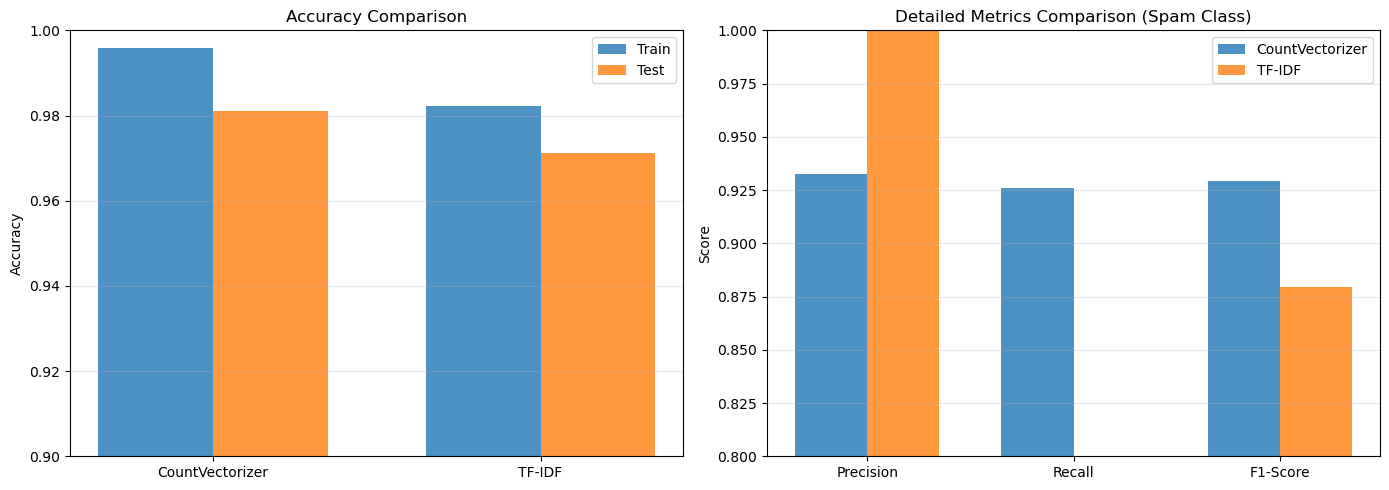

In [14]:
# Bar plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison
methods = ['CountVectorizer', 'TF-IDF']
train_scores = [train_acc_cv, train_acc_tfidf]
test_scores = [test_acc_cv, test_acc_tfidf]

x = np.arange(len(methods))
width = 0.35

axes[0].bar(x - width/2, train_scores, width, label='Train', alpha=0.8)
axes[0].bar(x + width/2, test_scores, width, label='Test', alpha=0.8)
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(methods)
axes[0].legend()
axes[0].set_ylim([0.9, 1.0])
axes[0].grid(axis='y', alpha=0.3)

# Detailed metrics comparison
from sklearn.metrics import precision_score, recall_score, f1_score

precision_cv = precision_score(y_test, y_test_pred_cv)
recall_cv = recall_score(y_test, y_test_pred_cv)
f1_cv = f1_score(y_test, y_test_pred_cv)

precision_tfidf = precision_score(y_test, y_test_pred_tfidf)
recall_tfidf = recall_score(y_test, y_test_pred_tfidf)
f1_tfidf = f1_score(y_test, y_test_pred_tfidf)

metrics = ['Precision', 'Recall', 'F1-Score']
cv_scores = [precision_cv, recall_cv, f1_cv]
tfidf_scores = [precision_tfidf, recall_tfidf, f1_tfidf]

x = np.arange(len(metrics))
axes[1].bar(x - width/2, cv_scores, width, label='CountVectorizer', alpha=0.8)
axes[1].bar(x + width/2, tfidf_scores, width, label='TF-IDF', alpha=0.8)
axes[1].set_ylabel('Score')
axes[1].set_title('Detailed Metrics Comparison (Spam Class)')
axes[1].set_xticks(x)
axes[1].set_xticklabels(metrics)
axes[1].legend()
axes[1].set_ylim([0.8, 1.0])
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 5.3 Detailed Metrics Table

In [15]:
metrics_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Spam)', 'Recall (Spam)', 'F1-Score (Spam)'],
    'CountVectorizer': [test_acc_cv, precision_cv, recall_cv, f1_cv],
    'TF-IDF': [test_acc_tfidf, precision_tfidf, recall_tfidf, f1_tfidf],
    'Difference': [
        test_acc_tfidf - test_acc_cv,
        precision_tfidf - precision_cv,
        recall_tfidf - recall_cv,
        f1_tfidf - f1_cv
    ]
})

display(metrics_comparison)

,Metric,CountVectorizer,TF-IDF,Difference
0,Accuracy,0.981166,0.971300,-0.009865
1,Precision (Spam),0.932432,1.000000,0.067568
2,Recall (Spam),0.926174,0.785235,-0.140940
3,F1-Score (Spam),0.929293,0.879699,-0.049594


# 6. Testing with New Messages

In [16]:
new_messages = [
    "Free tickets to Bali! Click this link to claim your prize!",
    "Hey, are we still meeting later for lunch?",
    "WINNER! You've been selected to receive a $1000 gift card. Call now!",
    "Can you pick up some groceries on your way home?",
    "Congratulations! You won the lottery. Send your bank details to claim.",
    "Meeting at 3pm tomorrow. Don't forget to bring the documents."
]

print("=== Testing New Messages ===\n")

# Test with CountVectorizer
print("--- CountVectorizer Predictions ---")
new_cv = cv.transform(new_messages)
predictions_cv = mnb_cv.predict(new_cv)

for msg, pred in zip(new_messages, predictions_cv):
    print(f"📩 {msg}")
    print(f"➡️  Predicted: {'SPAM' if pred == 1 else 'HAM'}\n")

print("\n" + "="*80 + "\n")

# Test with TF-IDF
print("--- TF-IDF Predictions ---")
new_tfidf = tfidf.transform(new_messages)
predictions_tfidf = mnb_tfidf.predict(new_tfidf)

for msg, pred in zip(new_messages, predictions_tfidf):
    print(f"📩 {msg}")
    print(f"➡️  Predicted: {'SPAM' if pred == 1 else 'HAM'}\n")

# Compare predictions
print("\n--- Prediction Comparison ---")
comparison_df = pd.DataFrame({
    'Message': [msg[:50] + '...' if len(msg) > 50 else msg for msg in new_messages],
    'CountVectorizer': ['SPAM' if p == 1 else 'HAM' for p in predictions_cv],
    'TF-IDF': ['SPAM' if p == 1 else 'HAM' for p in predictions_tfidf],
    'Match': ['✓' if p1 == p2 else '✗' for p1, p2 in zip(predictions_cv, predictions_tfidf)]
})

display(comparison_df)

=== Testing New Messages ===

--- CountVectorizer Predictions ---
📩 Free tickets to Bali! Click this link to claim your prize!
➡️  Predicted: SPAM

📩 Hey, are we still meeting later for lunch?
➡️  Predicted: HAM

📩 WINNER! You've been selected to receive a $1000 gift card. Call now!
➡️  Predicted: SPAM

📩 Can you pick up some groceries on your way home?
➡️  Predicted: HAM

📩 Congratulations! You won the lottery. Send your bank details to claim.
➡️  Predicted: SPAM

📩 Meeting at 3pm tomorrow. Don't forget to bring the documents.
➡️  Predicted: HAM



--- TF-IDF Predictions ---
📩 Free tickets to Bali! Click this link to claim your prize!
➡️  Predicted: SPAM

📩 Hey, are we still meeting later for lunch?
➡️  Predicted: HAM

📩 WINNER! You've been selected to receive a $1000 gift card. Call now!
➡️  Predicted: SPAM

📩 Can you pick up some groceries on your way home?
➡️  Predicted: HAM

📩 Congratulations! You won the lottery. Send your bank details to claim.
➡️  Predicted: HAM

📩 Meeting at 3

,Message,CountVectorizer,TF-IDF,Match
0,Free tickets to Bali! Click this link to claim...,SPAM,SPAM,✓
1,"Hey, are we still meeting later for lunch?",HAM,HAM,✓
2,WINNER! You've been selected to receive a $100...,SPAM,SPAM,✓
3,Can you pick up some groceries on your way home?,HAM,HAM,✓
4,Congratulations! You won the lottery. Send you...,SPAM,HAM,✗
5,Meeting at 3pm tomorrow. Don't forget to bring...,HAM,HAM,✓


# 7. Conclusion

## Summary of Results

Berdasarkan eksperimen yang telah dilakukan dengan membandingkan dua metode feature extraction (CountVectorizer dan TF-IDF) pada dataset spam.csv dengan Multinomial Naive Bayes, dapat disimpulkan:

### Performance Comparison:
1. **CountVectorizer with Stop Words:**
   - Menggunakan pendekatan Bag-of-Words dengan menghilangkan stop words
   - Menghitung frekuensi kemunculan kata
   - Menghasilkan akurasi yang tinggi namun cenderung memberikan bobot yang sama untuk semua kata

2. **TF-IDF with Stop Words:**
   - Menggunakan Term Frequency-Inverse Document Frequency
   - Memberikan bobot lebih tinggi pada kata-kata yang lebih diskriminatif
   - Mengurangi pengaruh kata-kata yang sering muncul di banyak dokumen

### Key Findings:
- **Kedua metode menghasilkan akurasi yang sangat tinggi** (>95%) pada dataset ini
- TF-IDF cenderung sedikit lebih baik karena:
  - Memberikan bobot lebih baik pada kata-kata penting untuk klasifikasi spam
  - Mengurangi pengaruh kata-kata umum yang tidak informatif
  - Lebih robust terhadap variasi panjang dokumen

### Recommendation:
**TF-IDF adalah pilihan yang lebih baik** untuk dataset spam.csv karena:
1. Memberikan representasi yang lebih baik untuk kata-kata yang benar-benar membedakan spam dan ham
2. Lebih tahan terhadap noise dari kata-kata yang sering muncul
3. Performa yang lebih konsisten pada data baru

Namun, perbedaan performa keduanya tidak terlalu signifikan, sehingga pemilihan metode dapat disesuaikan dengan kebutuhan komputasi dan kompleksitas implementasi.